# Adding Lat/Lon coordinates to GOES-16/17 L2 Data on Amazon Web Services

Author: Lucas Sterzinger | lsterzinger@ucdavis.edu |  [Follow me on Twitter](https://twitter.com/lucassterzinger)

This tutorial is paired with a medium post that [can be found here](https://lsterzinger.medium.com/add-lat-lon-coordinates-to-goes-16-goes-17-l2-data-and-plot-with-cartopy-27f07879157f) (and contains more detail on each step). 


## Import libraries

In [69]:
import urllib.request
from urllib.request import urlopen
import ssl
import json
ssl._create_default_https_context = ssl._create_unverified_context

In [70]:
import xarray as xr 
import s3fs
import matplotlib.pyplot as plt
import numpy as np
import netCDF4
import h5netcdf

# import ssl
# ssl._create_default_https_context = ssl._create_unverified_context


arrayOften = np.empty(10, dtype=object)

import cartopy.crs as ccrs
import cartopy.feature as cfeature

bucket_name = 'noaa-goes17'
product_name = 'ABI-L2-MCMIPC'
year = 2021
day_of_year = 0
hour = 0
band = 5

In [71]:
import warnings
warnings.filterwarnings('ignore')

## Open file with s3fs and xarray

In [72]:
fs = s3fs.S3FileSystem(anon=True)

In [73]:
# f = fs.open("s3://noaa-goes17/" + f'{product_name}/{year}/{day_of_year:03.0f}/{hour:02.0f}/OR_{product_name}-M6_G17_s20210501801176_e20210501803549_c20210501804089.nc')
#                 noaa-goes17/ABI-L1b-RadF/2019/079/14/OR_ABI-L1b-RadF-M6_G17_s20210501801176_e20210501803549_c20210501804089.nc

# total precipitable water
# 2023-01-01 01:56:10	
# i = 2

# ncArray = [
# 'ABI-L2-TPWC/2023/001/10/OR_ABI-L2-TPWC-M6_G17_s20230011001176_e20230011003549_c20230011005402.nc',
# 'ABI-L2-TPWC/2023/001/11/OR_ABI-L2-TPWC-M6_G17_s20230011101176_e20230011103549_c20230011105379.nc',
# 'ABI-L2-TPWC/2023/001/12/OR_ABI-L2-TPWC-M6_G17_s20230011201176_e20230011203549_c20230011205477.nc',
# 'ABI-L2-TPWC/2023/001/13/OR_ABI-L2-TPWC-M6_G17_s20230011301176_e20230011303549_c20230011305509.nc',
# 'ABI-L2-TPWC/2023/001/14/OR_ABI-L2-TPWC-M6_G17_s20230011401177_e20230011403550_c20230011405529.nc',
# 'ABI-L2-TPWC/2023/001/15/OR_ABI-L2-TPWC-M6_G17_s20230011501177_e20230011503550_c20230011505431.nc',
# 'ABI-L2-TPWC/2023/001/16/OR_ABI-L2-TPWC-M6_G17_s20230011601177_e20230011603550_c20230011605435.nc',
# 'ABI-L2-TPWC/2023/001/17/OR_ABI-L2-TPWC-M6_G17_s20230011701177_e20230011703550_c20230011705480.nc',
# 'ABI-L2-TPWC/2023/001/18/OR_ABI-L2-TPWC-M6_G17_s20230011801177_e20230011803550_c20230011805591.nc',
# 'ABI-L2-TPWC/2023/001/19/OR_ABI-L2-TPWC-M6_G17_s20230011901177_e20230011903550_c20230011906022.nc']

# f = fs.open("s3://noaa-goes17/{f}".format(f=ncArray[i]))



# f = fs.open('OR_ABI-L1b-RadC-M6C01_G17_s20230100601178_e20230100603551_c20230100603588.nc')
shapefile_path = 'jan12023/sigmets_202301010000_202302010000.dbf'



# f = fs.open("s3://noaa-goes17/ABI-L2-TPWM/2023/001/00/OR_ABI-L2-TPWM1-M6_G17_s20230010000254_e20230010000311_c20230010001184.nc")

# https://noaa-goes17.s3.amazonaws.com/ABI-L2-TPWC/2023/001/09/OR_ABI-L2-TPWC-M6_G17_s20230010951177_e20230010953549_c20230010955587.nc

# https://noaa-goes17.s3.amazonaws.com/ABI-L2-TPWC/2023/001/00/OR_ABI-L2-TPWC-M6_G17_s20230010001175_e20230010003548_c20230010005580.nc
# ABI-L2-TPWM 

In [74]:
# def get_s3_keys(bucket, s3_client, prefix = ''):
#     """
#     Generate the keys in an S3 bucket.

#     :param bucket: Name of the S3 bucket.
#     :param prefix: Only fetch keys that start with this prefix (optional).
#     """
    
#     kwargs = {'Bucket': bucket}

#     if isinstance(prefix, str):
#         kwargs['Prefix'] = prefix

#     while True:
#         resp = s3_client.list_objects_v2(**kwargs)
#         for obj in resp['Contents']:
#             key = obj['Key']
#             if key.startswith(prefix):
#                 yield key

#         try:
#             kwargs['ContinuationToken'] = resp['NextContinuationToken']
#         except KeyError:
#             break

In [75]:
ds = xr.open_dataset(f)
# ds = xr.open_dataset('10period/OR_ABI-L2-TPWC-M6_G17_s20230010951177_e20230010953549_c20230010955587.nc')

In [76]:
ds

<xarray.Dataset> Size: 2MB
Dimensions:                                           (y: 300, x: 500,
                                                       number_of_time_bounds: 2,
                                                       number_of_image_bounds: 2,
                                                       number_of_LZA_bounds: 2,
                                                       number_of_SZA_bounds: 2,
                                                       number_of_lat_bounds: 2,
                                                       sounding_emissive_bands: 7)
Coordinates:
    t                                                 datetime64[ns] 8B ...
  * y                                                 (y) float32 1kB 0.1281 ...
  * x                                                 (x) float32 2kB -0.0698...
    y_image                                           float32 4B ...
    x_image                                           float32 4B ...
    retrieval_local_zenith_angle                      float32 4B ...
    quantitative_local_zenith_angle                   float32 4B ...
    solar_zenith_angle                                float32 4B ...
    latitude                                          float32 4B ...
    sounding_emissive_wavelengths                     (sounding_emissive_bands) float32 28B ...
    sounding_emissive_band_ids                        (sounding_emissive_bands) int8 7B ...
Dimensions without coordinates: number_of_time_bounds, number_of_image_bounds,
                                number_of_LZA_bounds, number_of_SZA_bounds,
                                number_of_lat_bounds, sounding_emissive_bands
Data variables: (12/29)
    TPW                                               (y, x) float32 600kB ...
    DQF_Overall                                       (y, x) float32 600kB ...
    DQF_Retrieval                                     (y, x) float32 600kB ...
    DQF_SkinTemp                                      (y, x) float32 600kB ...
    time_bounds                                       (number_of_time_bounds) datetime64[ns] 16B ...
    goes_imager_projection                            int32 4B ...
    ...                                                ...
    latitude_bounds                                   (number_of_lat_bounds) float32 8B ...
    percent_uncorrectable_L0_errors                   float32 4B ...
    percent_uncorrectable_GRB_errors                  float32 4B ...
    total_attempted_retrievals                        float64 8B ...
    mean_obs_modeled_diff_sounding_emissive_bands     (sounding_emissive_bands) float32 28B ...
    std_dev_obs_modeled_diff_sounding_emissive_bands  (sounding_emissive_bands) float32 28B ...
Attributes: (12/29)
    naming_authority:          gov.nesdis.noaa
    Conventions:               CF-1.7
    Metadata_Conventions:      Unidata Dataset Discovery v1.0
    standard_name_vocabulary:  CF Standard Name Table (v35, 20 July 2016)
    institution:               DOC/NOAA/NESDIS > U.S. Department of Commerce,...
    project:                   GOES
    ...                        ...
    cdm_data_type:             Image
    time_coverage_start:       2023-01-01T12:01:17.6Z
    time_coverage_end:         2023-01-01T12:03:54.9Z
    timeline_id:               ABI Mode 6
    production_data_source:    Realtime
    id:                        049a31ce-88ed-4da0-9e40-ec928aff8838

***
## Define function to calculate lat/lon and to dataset as coordinates

The math for this function was obtained from https://makersportal.com/blog/2018/11/25/goes-r-satellite-latitude-and-longitude-grid-projection-algorithm

In [77]:
def calc_latlon(ds):
    # The math for this function was taken from 
    # https://makersportal.com/blog/2018/11/25/goes-r-satellite-latitude-and-longitude-grid-projection-algorithm 

    x = ds.x
    y = ds.y
    goes_imager_projection = ds.goes_imager_projection
    
    x,y = np.meshgrid(x,y)
    
    r_eq = goes_imager_projection.attrs["semi_major_axis"]
    r_pol = goes_imager_projection.attrs["semi_minor_axis"]
    l_0 = goes_imager_projection.attrs["longitude_of_projection_origin"] * (np.pi/180)
    h_sat = goes_imager_projection.attrs["perspective_point_height"]
    H = r_eq + h_sat
    
    a = np.sin(x)**2 + (np.cos(x)**2 * (np.cos(y)**2 + (r_eq**2 / r_pol**2) * np.sin(y)**2))
    b = -2 * H * np.cos(x) * np.cos(y)
    c = H**2 - r_eq**2
    
    r_s = (-b - np.sqrt(b**2 - 4*a*c))/(2*a)
    
    s_x = r_s * np.cos(x) * np.cos(y)
    s_y = -r_s * np.sin(x)
    s_z = r_s * np.cos(x) * np.sin(y)
    
    lat = np.arctan((r_eq**2 / r_pol**2) * (s_z / np.sqrt((H-s_x)**2 +s_y**2))) * (180/np.pi)
    lon = (l_0 - np.arctan(s_y / (H-s_x))) * (180/np.pi)
    
    ds = ds.assign_coords({
        "lat":(["y","x"],lat),
        "lon":(["y","x"],lon)
    })
    ds.lat.attrs["units"] = "degrees_north"
    ds.lon.attrs["units"] = "degrees_east"

    return ds

## Define function to get x/y bounds given lat/lon bounds

In [78]:
def get_xy_from_latlon(ds, lats, lons):
    lat1, lat2 = lats
    lon1, lon2 = lons

    lat = ds.lat.data
    lon = ds.lon.data
    
    x = ds.x.data
    y = ds.y.data
    
    x,y = np.meshgrid(x,y)
    
    x = x[(lat >= lat1) & (lat <= lat2) & (lon >= lon1) & (lon <= lon2)]
    y = y[(lat >= lat1) & (lat <= lat2) & (lon >= lon1) & (lon <= lon2)] 
    
    return ((min(x), max(x)), (min(y), max(y)))


***
## Add lat/lon to dataset

In [79]:
ds = calc_latlon(ds)

In [80]:

# import os
# import xarray as xr
# import pyproj
# import numpy as np
# import cartopy.crs as ccrs
# import cartopy.feature as cfeature
# import matplotlib.pyplot as plt
# from matplotlib.animation import FuncAnimation
# import os
# import xarray as xr
# import pyproj

# # Initialize an empty list to store the data
# data = []

# # Define the projection
# proj = pyproj.Proj(proj='geos', h='35786023.0', lon_0='-75.0', sweep='x')

# # Iterate over every file in the directory
# for filename in os.listdir('10period'):
#     # Open the file with xarray
#     ds = xr.open_dataset(f'10period/{filename}')
#     ds = calc_latlon(ds)

#     # Extract the required variables
#     time = ds.t.values
#     value = ds.TPW.values

#     # Convert x/y to longitude/latitude using xarray's assign_coords
#     ds = ds.assign_coords(longitude=('x', ds.x.values), latitude=('y', ds.y.values))
#     ds = ds.swap_dims({'x': 'longitude', 'y': 'latitude'})

#     # Extract the converted longitude and latitude
#     longitude = ds.longitude.values
#     latitude = ds.latitude.values

#     # Add the data to the list
#     data.append((time, latitude, longitude, value))
    
# data_string = repr(data)

# # Save the data string to a text file
# with open('data.txt', 'w') as file:
#     file.write(data_string)

In [81]:
# import os
# import xarray as xr
# import pyproj
# import numpy as np
# import cartopy.crs as ccrs
# import cartopy.feature as cfeature
# import matplotlib.pyplot as plt
# from matplotlib.animation import FuncAnimation

# # Initialize an empty list to store the data
# data = []

# # Define the projection
# proj = pyproj.Proj(proj='geos', h='35786023.0', lon_0='-75.0', sweep='x')

# # Iterate over every file in the directory
# for filename in os.listdir('nik'):
#     # Open the file with xarray
#     ds = xr.open_dataset(f'nik/{filename}')
#     ds = calc_latlon(ds)

#     # Extract the required variables
#     time = ds.t.values
#     lat = ds.x.values
#     lon = ds.y.values
#     value = ds.TPW.values

#     # Convert x/y to longitude/latitude
#     xx, yy = np.meshgrid(lat, lon)
#     longitude, latitude = proj(xx, yy, inverse=True)

#     # Add the data to the list
#     data.append((time, latitude, longitude, value))


# data_string = repr(data)

# # Save the data string to a text file
# with open('data10.txt', 'w') as file:
#     file.write(data_string)
    
# # Create a figure and axes
# fig = plt.figure(figsize=(10, 6))
# ax = plt.axes(projection=ccrs.PlateCarree())

# # Add map features
# ax.add_feature(cfeature.COASTLINE)
# ax.add_feature(cfeature.BORDERS)
# ax.add_feature(cfeature.STATES)
# ax.set_extent([-125, -66, 24, 50], crs=ccrs.PlateCarree())  # Set the map extent to the USA

# # Create a color map for the values
# cmap = plt.cm.Reds

# # Initialize the plot
# plot = None

# def update(frame):
#     global plot
    
#     # Clear the previous plot
#     if plot is not None:
#         plot.remove()
    
#     # Get the data for the current frame
#     time, latitude, longitude, value = data[frame]
    
#     # Create a contour plot with shades of red
#     plot = ax.contourf(longitude, latitude, value, cmap=cmap)
    
#     # Set the title with the current time
#     ax.set_title(f'Time: {time}')
    
#     return plot,

# # Create the animation
# # animation = FuncAnimation(fig, update, frames=len(data), interval=100, blit=True)

# # Display the animation
# plt.show()

In [82]:
# len(data)

In [83]:
# import matplotlib.pyplot as plt
# import matplotlib.animation as animation
# from matplotlib.colors import LinearSegmentedColormap
# import cartopy.crs as ccrs
# import cartopy.feature as cfeature

# # Create a colormap that goes from transparent to red
# colors = [(1, 0, 0, 0), (1, 0, 0, 1)]  # R -> G -> B -> Alpha
# cmap_name = 'transparent_to_red'
# cm = LinearSegmentedColormap.from_list(cmap_name, colors, N=100)

# fig = plt.figure(figsize=(8, 5))

# # Define the variable
# variable = "TPW"

# def update(frame):
#     plt.clf()  # Clear the current figure
    
#     # Get the subset for the current frame
#     subset = data[frame]
    
#     # Find the 50th percentile value
#     quantile_value = subset[variable].quantile(0.50)
    
#     # Filter the data to only include values larger than the 50th percentile
#     filtered_subset = subset[variable].where(subset[variable] > quantile_value)
    
#     # Create the plot
#     ax = plt.axes(projection=ccrs.AlbersEqualArea(central_longitude=-96, central_latitude=37.5))
#     filtered_subset.plot(
#         ax=ax,
#         x='lon',
#         y='lat',
#         transform=ccrs.PlateCarree(),
#         cmap=cm
#     )
    
#     ax.set_extent([-125, -66.5, 20, 50], ccrs.Geodetic())  # Approximate extent of the continental US
#     ax.add_feature(cfeature.COASTLINE)
#     ax.add_feature(cfeature.STATES)
#     ax.add_feature(cfeature.BORDERS, linestyle=':')

#     # Add a title with the current frame number
#     ax.set_title(f"Frame: {frame}")

# # Create the animation
# ani = animation.FuncAnimation(fig, update, frames=len(data), interval=100)

# plt.show()

In [84]:
# ds.coords

## Set lat/lon box and subset the data

In [85]:
lats = (30, 55)
lons = (-152, -112)

((x1,x2), (y1, y2)) = get_xy_from_latlon(ds, lats, lons)

In [86]:
subset = ds.sel(x=slice(x1,x2), y=slice(y2, y1))
subset

<xarray.Dataset> Size: 1MB
Dimensions:                                           (y: 154, x: 361,
                                                       number_of_time_bounds: 2,
                                                       number_of_image_bounds: 2,
                                                       number_of_LZA_bounds: 2,
                                                       number_of_SZA_bounds: 2,
                                                       number_of_lat_bounds: 2,
                                                       sounding_emissive_bands: 7)
Coordinates: (12/13)
    t                                                 datetime64[ns] 8B ...
  * y                                                 (y) float32 616B 0.1281...
  * x                                                 (x) float32 1kB -0.0385...
    y_image                                           float32 4B ...
    x_image                                           float32 4B ...
    retrieval_local_zenith_angle                      float32 4B ...
    ...                                                ...
    solar_zenith_angle                                float32 4B ...
    latitude                                          float32 4B ...
    sounding_emissive_wavelengths                     (sounding_emissive_bands) float32 28B ...
    sounding_emissive_band_ids                        (sounding_emissive_bands) int8 7B ...
    lat                                               (y, x) float32 222kB 51...
    lon                                               (y, x) float32 222kB -1...
Dimensions without coordinates: number_of_time_bounds, number_of_image_bounds,
                                number_of_LZA_bounds, number_of_SZA_bounds,
                                number_of_lat_bounds, sounding_emissive_bands
Data variables: (12/29)
    TPW                                               (y, x) float32 222kB ...
    DQF_Overall                                       (y, x) float32 222kB ...
    DQF_Retrieval                                     (y, x) float32 222kB ...
    DQF_SkinTemp                                      (y, x) float32 222kB ...
    time_bounds                                       (number_of_time_bounds) datetime64[ns] 16B ...
    goes_imager_projection                            int32 4B ...
    ...                                                ...
    latitude_bounds                                   (number_of_lat_bounds) float32 8B ...
    percent_uncorrectable_L0_errors                   float32 4B ...
    percent_uncorrectable_GRB_errors                  float32 4B ...
    total_attempted_retrievals                        float64 8B ...
    mean_obs_modeled_diff_sounding_emissive_bands     (sounding_emissive_bands) float32 28B ...
    std_dev_obs_modeled_diff_sounding_emissive_bands  (sounding_emissive_bands) float32 28B ...
Attributes: (12/29)
    naming_authority:          gov.nesdis.noaa
    Conventions:               CF-1.7
    Metadata_Conventions:      Unidata Dataset Discovery v1.0
    standard_name_vocabulary:  CF Standard Name Table (v35, 20 July 2016)
    institution:               DOC/NOAA/NESDIS > U.S. Department of Commerce,...
    project:                   GOES
    ...                        ...
    cdm_data_type:             Image
    time_coverage_start:       2023-01-01T12:01:17.6Z
    time_coverage_end:         2023-01-01T12:03:54.9Z
    timeline_id:               ABI Mode 6
    production_data_source:    Realtime
    id:                        049a31ce-88ed-4da0-9e40-ec928aff8838

In [87]:
# Assuming you have already run the previous code snippet to create the filtered_subset plot
import geopandas as gpd

# do this ten times
# shapefile_path = "jan12023/sigmets_202301010000_202302010000.shp"
gdf = gpd.read_file(shapefile_path)
gdf = gdf.sort_values(by="ISSUE")



## Do a quick plot of the blue channel with xarray

In [88]:
# from matplotlib.colors import LinearSegmentedColormap

# # Create a colormap that goes from transparent to red
# colors = [(1, 0, 0, 0), (1, 0, 0, 1)]  # R -> G -> B -> Alpha
# cmap_name = 'transparent_to_red'
# cm = LinearSegmentedColormap.from_list(cmap_name, colors, N=100)

# fig = plt.figure(figsize=(8,5))

# # Define the variable
# variable = "TPW"

# # Find the 50th percentile value
# quantile_value = subset[variable].quantile(0.50)

# # Filter the data to only include values larger than the 50th percentile
# filtered_subset = subset[variable].where(subset[variable] > quantile_value)

# p = filtered_subset.plot(
#     x='lon', y='lat', 
#     subplot_kws={'projection' : ccrs.Orthographic(-119.4179, 36.7783)}, 
#     # subplot_kws={'projection': ccrs.AlbersEqualArea(central_longitude=-96, central_latitude=37.5)},
#     transform=ccrs.PlateCarree(),
#     cmap=cm  # Use the custom colormap
# )

# p.axes.set_extent([-125, -114, 32, 42], ccrs.Geodetic())  # Approximate coordinates of California
# # p.axes.set_extent([-125, -66.5, 20, 50], ccrs.Geodetic())  # Approximate extent of the continental US


# p.axes.add_feature(cfeature.COASTLINE)
# p.axes.add_feature(cfeature.STATES)
# p.axes.add_feature(cfeature.BORDERS, linestyle=':')
# # p.axes.add_feature(cfeature.LAKES, alpha=0.5)
# # p.axes.add_feature(cfeature.RIVERS)

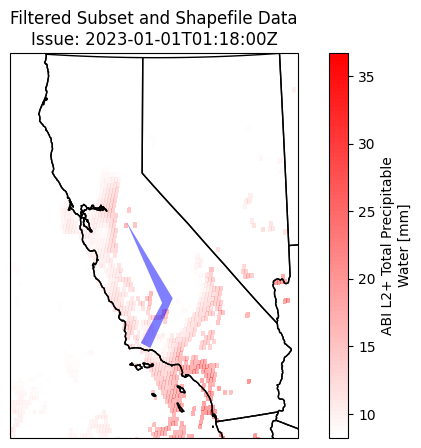

In [89]:
from matplotlib.colors import LinearSegmentedColormap

# Create a colormap that goes from transparent to red
colors = [(1, 0, 0, 0), (1, 0, 0, 1)]  # R -> G -> B -> Alpha
cmap_name = 'transparent_to_red'
cm = LinearSegmentedColormap.from_list(cmap_name, colors, N=100)

arrayOften2 = [None] * 10  # Initialize an array of size ten

# for i in range(1, 11):  # Loop over the indices from 1 to 10

#     fig = plt.figure(figsize=(8,5))  # Create a new figure for each index

#     # Define the variable
#     variable = "TPW"

#     # Find the 50th percentile value
#     quantile_value = subset[variable].quantile(0.50)

#     # Filter the data to only include values larger than the 50th percentile
#     filtered_subset = subset[variable].where(subset[variable] > quantile_value)

#     p = filtered_subset.plot(
#         x='lon', y='lat', 
#         subplot_kws={'projection' : ccrs.Orthographic(-119.4179, 36.7783)}, 
#         # subplot_kws={'projection': ccrs.AlbersEqualArea(central_longitude=-96, central_latitude=37.5)},
#         transform=ccrs.PlateCarree(),
#         cmap=cm  # Use the custom colormap
#     )

#     # Get the current issue time (replace 'frame' with the appropriate value)
#     current_issue = gdf.iloc[i]["ISSUE"]

    # # Filter the GeoDataFrame to include only the shapes active at the current issue time
    # current_shapes = gdf[(gdf["ISSUE"] <= current_issue) & (gdf["EXPIRE"] > current_issue)]

    # # Add the current shapes to the existing plot
    # # current_shapes.plot(ax=p.axes, markersize=5, color='blue')
    # # Add the current shapes to the existing plot with 50% opacity
    # current_shapes.plot(ax=p.axes, markersize=5, color='blue', alpha=0.5, transform=ccrs.PlateCarree())
    # # Update the plot title to include the current issue time
    # p.axes.set_title(f"Filtered Subset and Shapefile Data\nIssue: {current_issue}")



    # p.axes.set_extent([-125, -114, 32, 42], ccrs.Geodetic())  # Approximate coordinates of California
    # # p.axes.set_extent([-125, -66.5, 20, 50], ccrs.Geodetic())  # Approximate extent of the continental US


    # p.axes.add_feature(cfeature.COASTLINE)
    # p.axes.add_feature(cfeature.STATES)
    # p.axes.add_feature(cfeature.BORDERS, linestyle=':')
    # # p.axes.add_feature(cfeature.LAKES, alpha=0.5)
    # # p.axes.add_feature(cfeature.RIVERS)
    # # Display the updated plot
    # # plt.tight_layout()
    # plt.show() 
    # arrayOften[i-1] = p

In [94]:
# arrayOften

array([None, None,
       None, None, None, None, None, None, None], dtype=object)

## Get RGB data, and calculate "true" green from the "fake" green (veggie) channel

In [91]:
# r = subset['CMI_C02'].data; r = np.clip(r, 0, 1)
# g = subset['CMI_C03'].data; g = np.clip(g, 0, 1)
# b = subset['CMI_C01'].data; b = np.clip(b, 0, 1)

In [92]:
# gamma = 2.5; r = np.power(r, 1/gamma); g = np.power(g, 1/gamma); b = np.power(b, 1/gamma)
# g_true = 0.45 * r + 0.1 * g + 0.45 * b
# g_true = np.clip(g_true, 0, 1)
# rgb = np.dstack((r, g_true, b))

In [93]:
# fig = plt.figure(figsize=(8,5))
# plt.imshow(rgb)

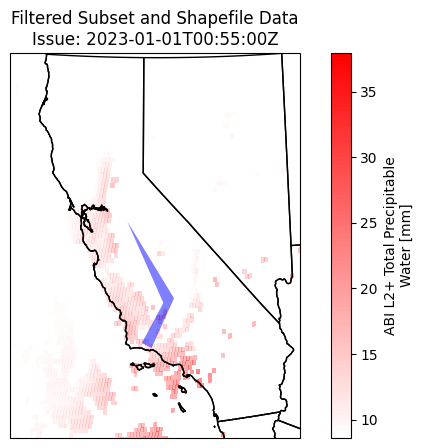

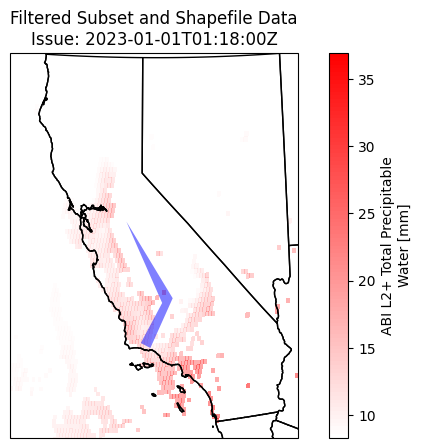

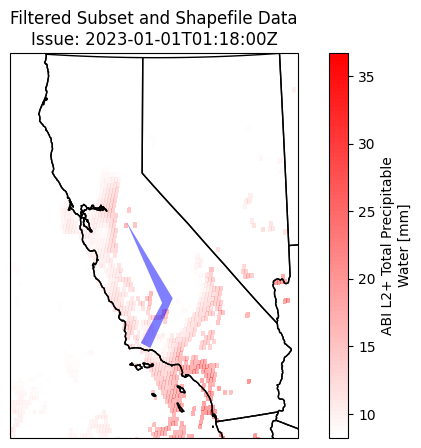

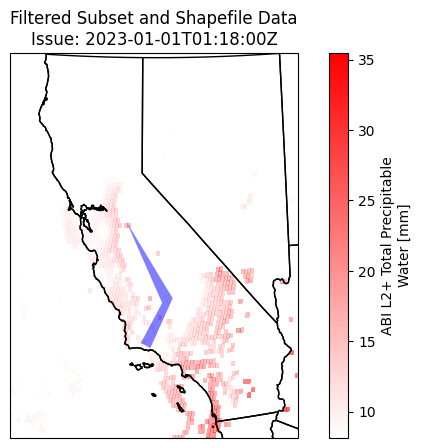

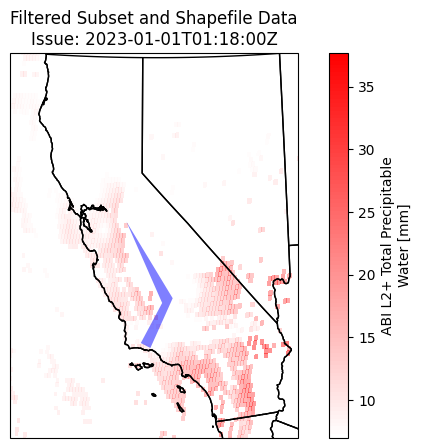

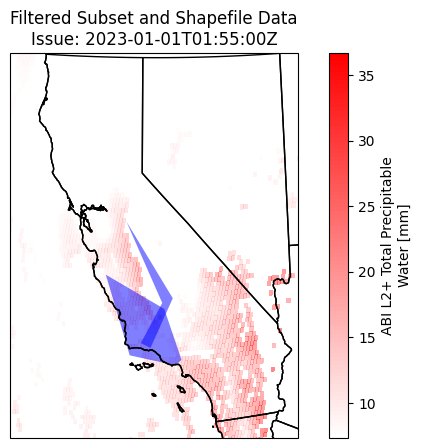

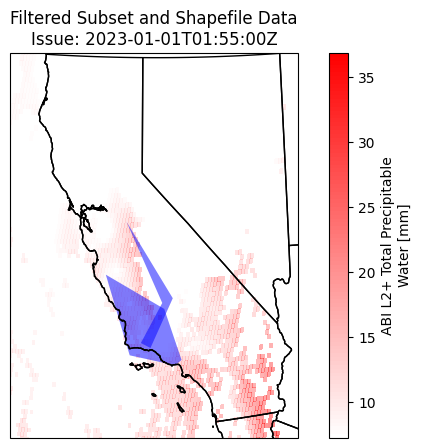

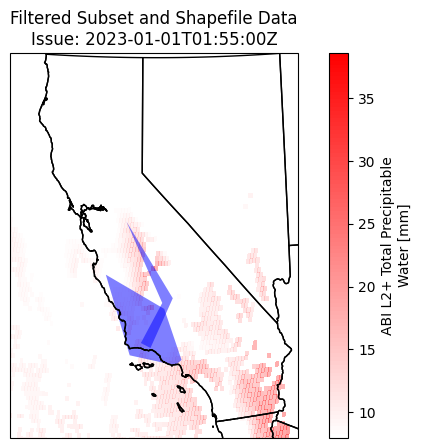

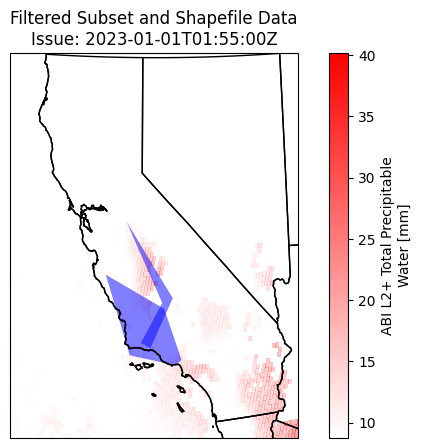

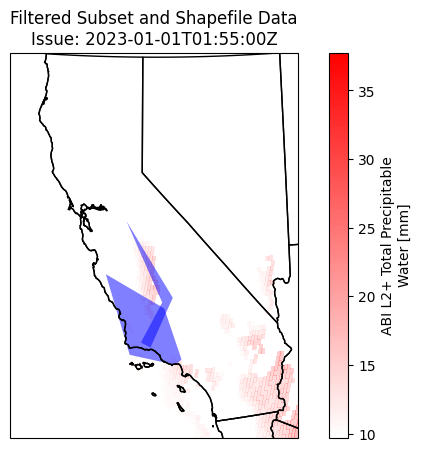

In [98]:
i = 2

ncArray = [
'ABI-L2-TPWC/2023/001/10/OR_ABI-L2-TPWC-M6_G17_s20230011001176_e20230011003549_c20230011005402.nc',
'ABI-L2-TPWC/2023/001/11/OR_ABI-L2-TPWC-M6_G17_s20230011101176_e20230011103549_c20230011105379.nc',
'ABI-L2-TPWC/2023/001/12/OR_ABI-L2-TPWC-M6_G17_s20230011201176_e20230011203549_c20230011205477.nc',
'ABI-L2-TPWC/2023/001/13/OR_ABI-L2-TPWC-M6_G17_s20230011301176_e20230011303549_c20230011305509.nc',
'ABI-L2-TPWC/2023/001/14/OR_ABI-L2-TPWC-M6_G17_s20230011401177_e20230011403550_c20230011405529.nc',
'ABI-L2-TPWC/2023/001/15/OR_ABI-L2-TPWC-M6_G17_s20230011501177_e20230011503550_c20230011505431.nc',
'ABI-L2-TPWC/2023/001/16/OR_ABI-L2-TPWC-M6_G17_s20230011601177_e20230011603550_c20230011605435.nc',
'ABI-L2-TPWC/2023/001/17/OR_ABI-L2-TPWC-M6_G17_s20230011701177_e20230011703550_c20230011705480.nc',
'ABI-L2-TPWC/2023/001/18/OR_ABI-L2-TPWC-M6_G17_s20230011801177_e20230011803550_c20230011805591.nc',
'ABI-L2-TPWC/2023/001/19/OR_ABI-L2-TPWC-M6_G17_s20230011901177_e20230011903550_c20230011906022.nc']

for i in range(0,10):

    f = fs.open("s3://noaa-goes17/{f}".format(f=ncArray[i]))
    ds = xr.open_dataset(f)
    ds = calc_latlon(ds)
    lats = (30, 55)
    lons = (-152, -112)

    ((x1,x2), (y1, y2)) = get_xy_from_latlon(ds, lats, lons)
    subset = ds.sel(x=slice(x1,x2), y=slice(y2, y1))
    
    fig = plt.figure(figsize=(8,5))  # Create a new figure for each index

    # Define the variable
    variable = "TPW"

    # Find the 50th percentile value
    quantile_value = subset[variable].quantile(0.50)

    # Filter the data to only include values larger than the 50th percentile
    filtered_subset = subset[variable].where(subset[variable] > quantile_value)

    p = filtered_subset.plot(
        x='lon', y='lat', 
        subplot_kws={'projection' : ccrs.Orthographic(-119.4179, 36.7783)}, 
        # subplot_kws={'projection': ccrs.AlbersEqualArea(central_longitude=-96, central_latitude=37.5)},
        transform=ccrs.PlateCarree(),
        cmap=cm  # Use the custom colormap
    )

    # Get the current issue time (replace 'frame' with the appropriate value)
    current_issue = gdf.iloc[i]["ISSUE"]

    # Filter the GeoDataFrame to include only the shapes active at the current issue time
    current_shapes = gdf[(gdf["ISSUE"] <= current_issue) & (gdf["EXPIRE"] > current_issue)]

    # Add the current shapes to the existing plot
    # current_shapes.plot(ax=p.axes, markersize=5, color='blue')
    # Add the current shapes to the existing plot with 50% opacity
    current_shapes.plot(ax=p.axes, markersize=5, color='blue', alpha=0.5, transform=ccrs.PlateCarree())
    # Update the plot title to include the current issue time
    p.axes.set_title(f"Filtered Subset and Shapefile Data\nIssue: {current_issue}")



    p.axes.set_extent([-125, -114, 32, 42], ccrs.Geodetic())  # Approximate coordinates of California
    # p.axes.set_extent([-125, -66.5, 20, 50], ccrs.Geodetic())  # Approximate extent of the continental US

    p.axes.add_feature(cfeature.COASTLINE)
    p.axes.add_feature(cfeature.STATES)
    p.axes.add_feature(cfeature.BORDERS, linestyle=':')
    # p.axes.add_feature(cfeature.LAKES, alpha=0.5)
    # p.axes.add_feature(cfeature.RIVERS)
    # Display the updated plot
    # plt.tight_layout()
    plt.show() 
    arrayOften[i] = p



In [99]:
arrayOften

array([<cartopy.mpl.geocollection.GeoQuadMesh object at 0x1778b2120>,
      dtype=object)